# K-Means (Clustering Algorithm)

In [2]:
import mglearn
from sklearn.cluster import KMeans

->K-Means also perform poorly if the clusters have more complex shapes, like make_moons data we encountered before.<br>
->Lets take make_moons dataset and show you with an example.

Text(0, 0.5, 'Feature 1')

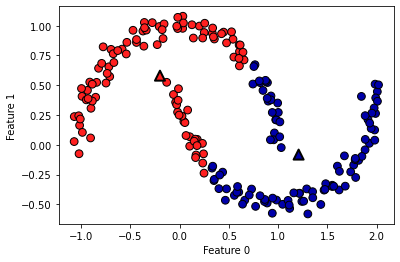

In [3]:
from sklearn.datasets import make_moons

#generate synthetic two_moons data (with less noise this time)
X, y =  make_moons(n_samples=200, noise=0.05, random_state=0)

#cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#plot the cluster assignments and cluster centers
from matplotlib import pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^',
            c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [4]:
#As you have seen above that K-means failed to identify clusters with complex shapes
#But now using more cluster centers we can find more expressive representation with K-means.
#Look below.

Cluster Membership:
[4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


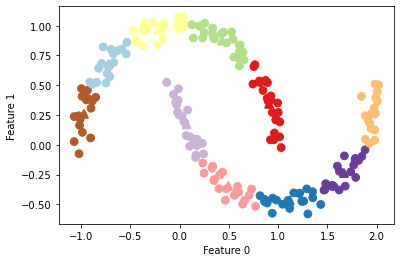

In [5]:
X, y =  make_moons(n_samples=200, noise=0.05, random_state=0)

#cluster the data into two clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#plot the cluster assignments and cluster centers
from matplotlib import pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', s=60,
            c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster Membership:\n{}".format(y_pred))


*We used 10 cluster centers, which means each point is now assigned a number between 0 and 9.<br>
*Using 10-dimensional representation, it would now be possible to seperate the two half-moon shapes using a linear model.<br>
*It is also possible to get an even more expressive representation of the data by using distances to each of the cluster
centers as features.<br>
*This can be done by using the transform method of kmeans.

In [6]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance feature: {}".format(distance_features))

Distance feature shape: (200, 10)
Distance feature: [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


Note:-<br>
1-K-Means is a vey popular algorithm for clustering which relatively runs quickly and easy to understand.<br>
2-K-Means scales easily to large datasets, and using 'MiniBatchKMeans' class, which can handle very large datsets.<br>
3-One drawback is of KMeans is that relies on a random initialization means outcome of algorithm depends on random seed.<br>
4-By default, scikit-learn runs the algorithm 10 times with 10 different random initializations, returns the best result.